dt - Độ chính xác trên tập training: 1.0
dt - Độ chính xác trên tập test: 0.8784
dt - Dự đoán cho 5 samples đầu tiên: [7 2 1 0 4]
nb - Độ chính xác trên tập training: 0.5649
nb - Độ chính xác trên tập test:  0.5558
nb - Dự đoán cho 5 samples đầu tiên: [9 2 1 0 9]
knn - Độ chính xác trên tập training: 0.9867166666666667
knn - Độ chính xác trên tập test: 0.9705
knn - Dự đoán cho 5 samples đầu tiên: [7 2 1 0 4]


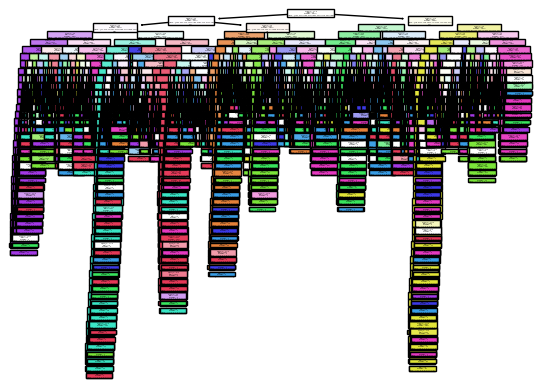

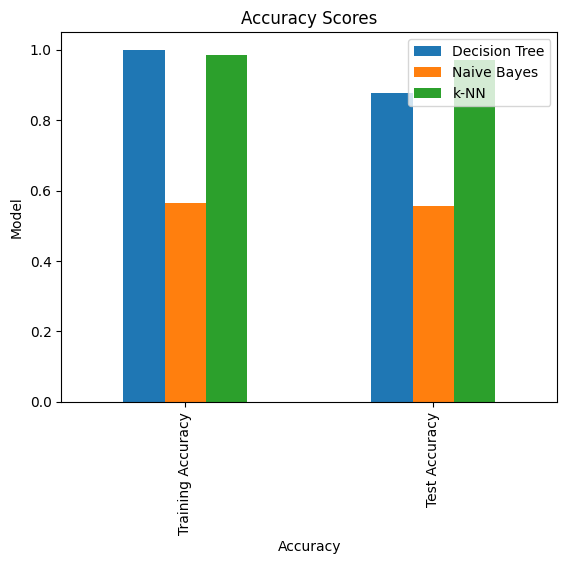

In [1]:
from keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load

# Load dữ liệu mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Chuẩn hóa dữ liệu
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

# DECISION TREE
# Xây dựng mô hình Decision Tree
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

# Tính độ chính xác trên tập training và tập test
train_acc_dt = accuracy_score(train_y, dt.predict(train_X))
test_acc_dt = accuracy_score(test_y, dt.predict(test_X))
print("dt - Độ chính xác trên tập training:", train_acc_dt)
print("dt - Độ chính xác trên tập test:", test_acc_dt)

# Lưu mô hình xuống tập tin
dump(dt, 'DecisionTree.joblib')

# Load mô hình từ tập tin
dt_loaded = load('DecisionTree.joblib')

# Chạy inference (tính prediction) cho ít nhất 5 input samples
samples = test_X[:5]
predictions = dt_loaded.predict(samples)
print("dt - Dự đoán cho 5 samples đầu tiên:", predictions)

# Trực quan hóa cây với hàm tree.plot_tree()
from sklearn.tree import plot_tree
plot_tree(dt, filled = True)

# NAVIE BAYES
# Xây dựng mô hình Naive Bayes
nb = GaussianNB()
nb.fit(train_X, train_y)

# Tính độ chính xác trên tập training và tập test
train_acc_nb = accuracy_score(train_y, nb.predict(train_X))
test_acc_nb = accuracy_score(test_y, nb.predict(test_X))
print("nb - Độ chính xác trên tập training:", train_acc_nb)
print("nb - Độ chính xác trên tập test: ", test_acc_nb)

# Lưu mô hình xuống tập tin
dump(nb, 'NavieBayes.joblib')

# Load mô hình lên từ tập tin
nb_loaded = load('NavieBayes.joblib')

# Chạy inference (tính prediction) cho ít nhất 5 input samples
samples1 = test_X[:5]
predictions1 = nb_loaded.predict(samples1)
print("nb - Dự đoán cho 5 samples đầu tiên:", predictions1)

# k-NN
# Xây dựng mô hình k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)

#Tính độ chính xác trên tập training và tập test
train_acc_knn = accuracy_score(train_y, knn.predict(train_X))
test_acc_knn = accuracy_score(test_y, knn.predict(test_X))
print("knn - Độ chính xác trên tập training:", train_acc_knn)
print("knn - Độ chính xác trên tập test:", test_acc_knn)

# Lưu mô hình xuống tập tin
dump(knn, 'Knn.joblib')

# Load mô hình từ tập tin
knn_loaded = load('Knn.joblib')

# Chạy inference (tính prediction) cho ít nhất 5 input samples
samples2 = test_X[:5]
predictions2 = knn_loaded.predict(samples2)
print("knn - Dự đoán cho 5 samples đầu tiên:", predictions2)

# Sử dụng thư viện matplotlib.pyplot vẽ biểu đồ cột đôi thể hiện độ chính xác trên tập training và tập test
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Tạo dataframe
data = {'Decision Tree': [train_acc_dt, test_acc_dt],
        'Naive Bayes': [train_acc_nb, test_acc_nb],
        'k-NN': [train_acc_knn, test_acc_knn]}
df = pd.DataFrame(data, index=['Training Accuracy', 'Test Accuracy'])

# Tạo biểu đồ
fig, ax = plt.subplots()
df.plot(kind='bar', ax=ax)
ax.set_title('Accuracy Scores')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')
ax.legend(loc='best')
plt.show()